# 1
## 1.1

In [1]:
import scipy.io
import numpy as np

# Load data
data = scipy.io.loadmat('HW02_Problem1.mat')
X = data['X']# Adjust key name if needed

n = len(X)
x_bar = np.mean(X)
s2 = np.var(X, ddof=1)  # ddof=1 uses n-1 denominator
s = np.sqrt(s2)
print(f"n = {n}")
print(f"x̄ = {x_bar:.4f}")
print(f"s² = {s2:.4f}")
print(f"sigma, std = {s:.4f}")

n = 20
x̄ = 0.2344
s² = 0.0214
sigma, std = 0.1462


## 1.2

In [2]:
from scipy import stats
n = 20
alpha = 0.1
df = n - 1
confidence_level = 1 - alpha

# This returns the entire interval, but we can extract the critical value
interval = stats.t.interval(confidence_level, df)
t_critical = interval[1]  # positive critical value
print(f"t-critical: {t_critical:.4f}")

# Standard error of the mean
sem = s / np.sqrt(n)

# Margin of error
margin = t_critical * sem

# Confidence interval
ci_lower = x_bar - margin
ci_upper = x_bar + margin

print(f"\nStandard Error: s/√n = {sem:.6f}")
print(f"Margin of error: {margin:.6f}")
print(f"\n{confidence_level*100:.1f}% Confidence Interval for μ:")
print(f"({ci_lower:.6f}, {ci_upper:.6f})")
print(f"Or approximately: ({ci_lower:.4f}, {ci_upper:.4f})")

# Verification: using scipy's built-in function
ci_scipy = stats.t.interval(confidence_level, df, loc=x_bar, scale=sem)
print(f"\nVerification with scipy.stats.t.interval: ({ci_scipy[0]:.6f}, {ci_scipy[1]:.6f})")

t-critical: 1.7291

Standard Error: s/√n = 0.032694
Margin of error: 0.056533

90.0% Confidence Interval for μ:
(0.177830, 0.290896)
Or approximately: (0.1778, 0.2909)

Verification with scipy.stats.t.interval: (0.177830, 0.290896)


## 1.3


Parameters:
True mean μ = 1.0
True variance = 5, σ = 2.2361
Sample size n = 10
Significance level α = 0.2
Confidence level = 80.0%
Degrees of freedom = 9
t-critical value (t_9,0.900) = 1.3830
Number of repetitions = 50

Results:
Number of intervals containing true mean: 37/50
Expected number (80% of 50): 40.0


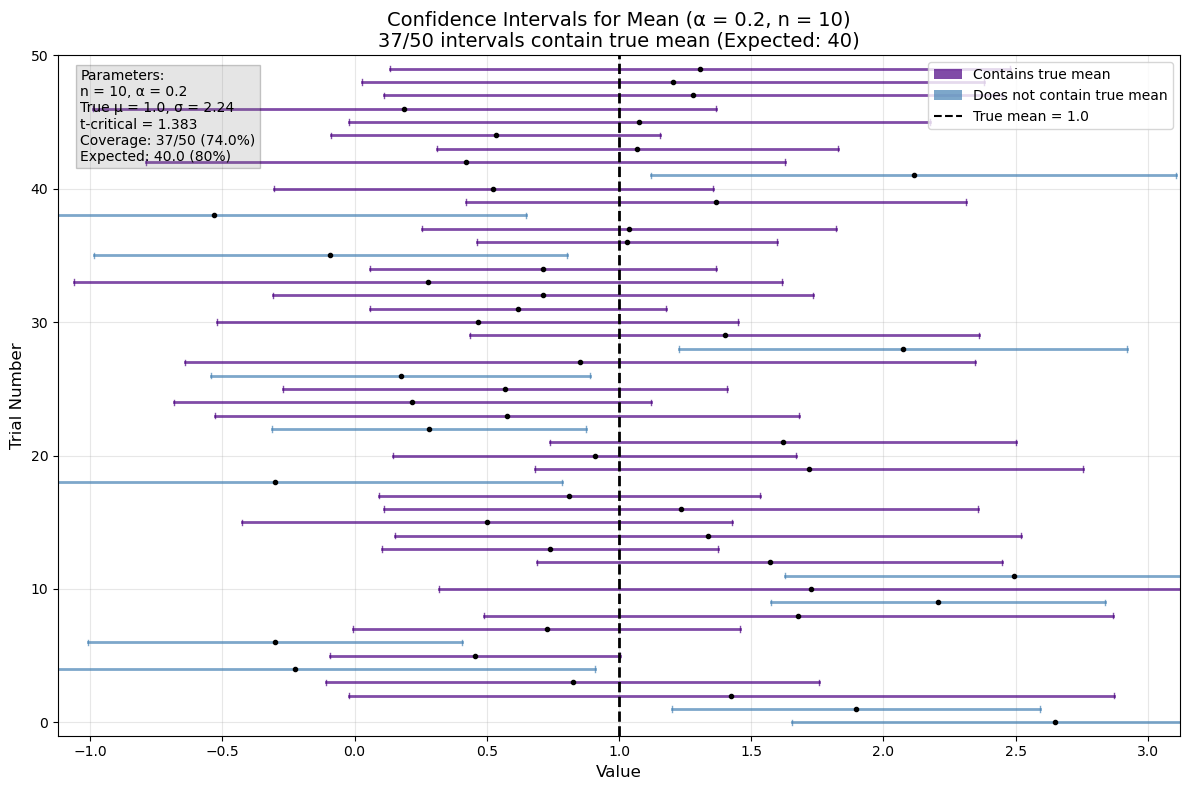

In [ ]:
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(0)

# Parameters
mu_true = 1.0
sigma_true = np.sqrt(5)  # Variance is 5, so std dev = sqrt(5)
n = 10                    # Sample size
alpha = 0.2               # Significance level
num_reps = 50             # Number of repetitions

# Critical value for t-distribution
df = n - 1                # Degrees of freedom
t_critical = stats.t.ppf(1 - alpha/2, df)  # Two-sided: 1 - α/2

print(f"Parameters:")
print(f"True mean μ = {mu_true}")
print(f"True variance = 5, σ = {sigma_true:.4f}")
print(f"Sample size n = {n}")
print(f"Significance level α = {alpha}")
print(f"Confidence level = {1-alpha:.1%}")
print(f"Degrees of freedom = {df}")
print(f"t-critical value (t_{df},{1-alpha/2:.3f}) = {t_critical:.4f}")
print(f"Number of repetitions = {num_reps}")

# Storage for results
confidence_intervals = []
means = []
std_devs = []
contains_true_mean = []

# Generate 50 confidence intervals
for rep in range(num_reps):
    # Generate random sample from N(1, 5)
    sample = np.random.normal(mu_true, sigma_true, n)
    
    # Calculate sample statistics
    x_bar = np.mean(sample)
    s = np.std(sample, ddof=1)  # ddof=1 for sample standard deviation
    
    # Calculate standard error and margin of error
    se = s / np.sqrt(n)
    margin = t_critical * se
    
    # Confidence interval
    ci_lower = x_bar - margin
    ci_upper = x_bar + margin
    
    # Store results
    confidence_intervals.append((ci_lower, ci_upper))
    means.append(x_bar)
    std_devs.append(s)
    
    # Check if interval contains true mean
    contains = ci_lower <= mu_true <= ci_upper
    contains_true_mean.append(contains)

# Count how many intervals contain the true mean
num_contain_true = sum(contains_true_mean)
expected_num = (1 - alpha) * num_reps

print(f"\nResults:")
print(f"Number of intervals containing true mean: {num_contain_true}/{num_reps}")
print(f"Expected number ({(1-alpha):.0%} of {num_reps}): {expected_num:.1f}")

# Create visualization
plt.figure(figsize=(12, 8))

# Plot each confidence interval
for i, (ci_lower, ci_upper) in enumerate(confidence_intervals):
    color = 'indigo' if contains_true_mean[i] else 'steelblue'
    plt.plot([ci_lower, ci_upper], [i, i], color=color, linewidth=2, alpha=0.7)
    plt.plot(means[i], i, 'o', color='black', markersize=3)  # Plot sample mean
    
    # Add short vertical lines at CI boundaries
    plt.plot([ci_lower, ci_lower], [i-0.2, i+0.2], color=color, linewidth=1, alpha=0.7)
    plt.plot([ci_upper, ci_upper], [i-0.2, i+0.2], color=color, linewidth=1, alpha=0.7)

# Add vertical line at true mean
plt.axvline(x=mu_true, color='black', linestyle='--', linewidth=2, 
            label=f'True mean (μ = {mu_true})')

# Set labels and title
plt.xlabel('Value', fontsize=12)
plt.ylabel('Trial Number', fontsize=12)
plt.title(f'Confidence Intervals for Mean (α = {alpha}, n = {n})\n'
          f'{num_contain_true}/{num_reps} intervals contain true mean '
          f'(Expected: {int(expected_num)})', fontsize=14)

# Customize the plot
plt.grid(True, alpha=0.3)
plt.xlim(mu_true - 3*sigma_true/np.sqrt(n), mu_true + 3*sigma_true/np.sqrt(n))  # Reasonable x-range
plt.ylim(-1, num_reps)

# Add legend with custom colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='indigo', alpha=0.7, label='Contains true mean'),
    Patch(facecolor='steelblue', alpha=0.7, label='Does not contain true mean'),
    plt.Line2D([0], [0], color='black', linestyle='--', label=f'True mean = {mu_true}')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Add text box with summary statistics
summary_text = (f'Parameters:\n'
                f'n = {n}, α = {alpha}\n'
                f'True μ = {mu_true}, σ = {sigma_true:.2f}\n'
                f'Coverage: {num_contain_true}/{num_reps} '
                f'({num_contain_true/num_reps:.1%})\n'
                f'Expected: {expected_num:.1f} ({1-alpha:.0%})')
plt.text(0.02, 0.98, summary_text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=10,
         bbox=dict(boxstyle='square', facecolor='gray', alpha=0.2))

plt.tight_layout()
plt.show()


With $\alpha = 0.2$, we expect a confidence level of $(1-\alpha) \times 100\% = 80\%$. If we were to repeat the experiment of taking 10 samples from $N(1,5)$ and constructing an 80% confidence interval many times, approximately 80% of those intervals should contain the true population mean $\mu = 1$. In our specific simulation with 50 repetitions, we observed that 37 out of 50 intervals contained the true mean, which corresponds to 74% coverage. This is slightly below the expected 80%, but well within the range of normal sampling variability for a simulation of this size. The discrepancy arises because our simulation represents only 50 realizations of a random process—if we increased the number of repetitions to, say, 10,000, the observed coverage percentage would converge much more closely to the nominal 80%. The binomial distribution with parameters $n=50$ and $p=0.8$ has a standard deviation of $\sqrt{50 \times 0.8 \times 0.2} \approx 2.83$, so observing 37 successes instead of the expected 40 represents a difference of only about 1 standard deviation, which is not statistically unusual. This exercise illustrates the correct interpretation of confidence intervals: they provide a procedure that, when repeated many times, will contain the true parameter at the stated rate in the long run, though any single experiment or small set of experiments may show deviation from that rate due to random sampling variation. 

# 2


# 4

Processing n = 1...
Processing n = 10...
Processing n = 100...
Processing n = 1000...
Processing n = 10000...


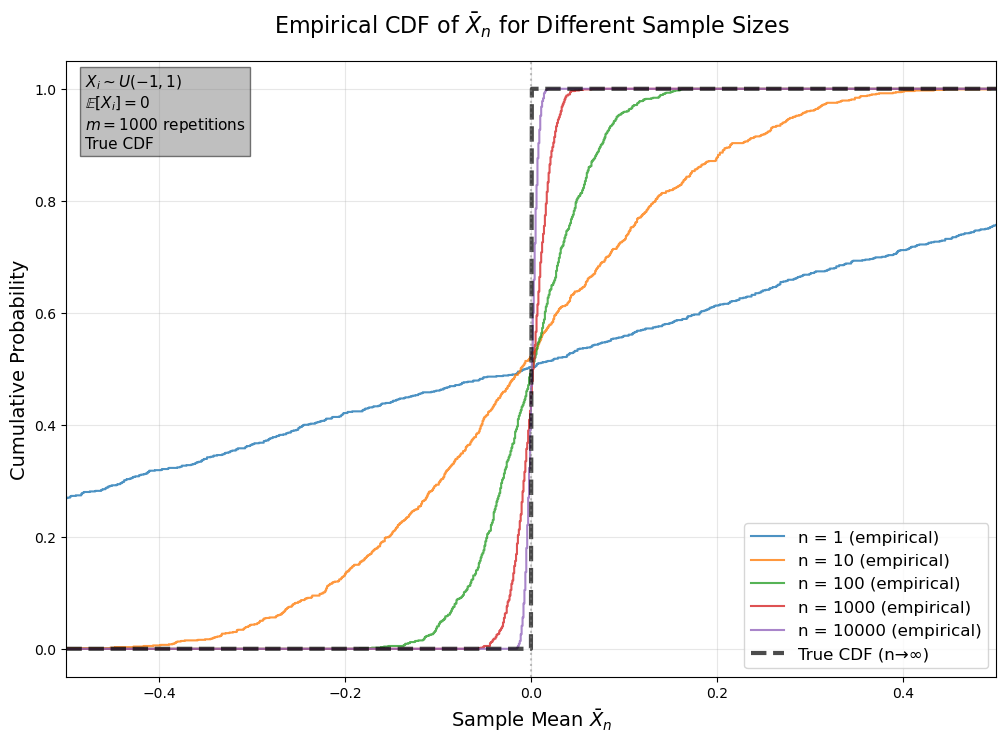


STATISTICAL ANALYSIS

n = 1:
  Empirical mean of X̄_n: 0.500031
  Empirical variance of X̄_n: 0.246725
  Theoretical variance: 0.333333
  Proportion of X̄_n within ±0.1: 0.492
  Proportion of X̄_n within ±0.05: 0.490

n = 10:
  Empirical mean of X̄_n: 0.500031
  Empirical variance of X̄_n: 0.246725
  Theoretical variance: 0.033333
  Proportion of X̄_n within ±0.1: 0.492
  Proportion of X̄_n within ±0.05: 0.490

n = 100:
  Empirical mean of X̄_n: 0.500031
  Empirical variance of X̄_n: 0.246725
  Theoretical variance: 0.003333
  Proportion of X̄_n within ±0.1: 0.492
  Proportion of X̄_n within ±0.05: 0.490

n = 1000:
  Empirical mean of X̄_n: 0.500031
  Empirical variance of X̄_n: 0.246725
  Theoretical variance: 0.000333
  Proportion of X̄_n within ±0.1: 0.492
  Proportion of X̄_n within ±0.05: 0.490

n = 10000:
  Empirical mean of X̄_n: 0.500031
  Empirical variance of X̄_n: 0.246725
  Theoretical variance: 0.000033
  Proportion of X̄_n within ±0.1: 0.492
  Proportion of X̄_n within ±

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
m = 1000  # Number of repetitions for each n
n_values = [1, 10, 100, 1000, 10000]  # Sample sizes to test

# Store results
empirical_cdfs = {}
x_values = np.linspace(-0.5, 0.5, 1000)  # Range for plotting CDFs
# True CDF for X̄_n as n → ∞ (degenerate at 0)
true_cdf = np.where(x_values < 0, 0, 1)

plt.figure(figsize=(12, 8))

# Generate and plot for each n
for n in n_values:
    print(f"Processing n = {n}...")
    
    # Store sample means
    sample_means = np.zeros(m)
    
    # Generate m samples of X̄_n
    for i in range(m):
        # Generate n realizations from U(-1, 1)
        samples = np.random.uniform(-1, 1, n)
        # Compute sample mean
        sample_means[i] = np.mean(samples)

    # Compute empirical CDF
    ecdf = ECDF(sample_means)

    # Evaluate at x_values for plotting
    ecdf_vals = ecdf(x_values)
    empirical_cdfs[n] = (sample_means, ecdf_vals)
    
    # Plot this empirical CDF
    plt.step(x_values, ecdf_vals, where='post', linewidth=1.5, alpha=0.8, 
             label=f'n = {n} (empirical)')

# Plot true CDF (step function at 0)
plt.plot(x_values, true_cdf, 'k--', linewidth=3, alpha=0.7, label='True CDF (n→∞)')

# Add vertical line at x = 0
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.5)

# Customize plot
plt.xlabel(r'Sample Mean $\bar{X}_n$', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.title(r'Empirical CDF of $\bar{X}_n$ for Different Sample Sizes', fontsize=16, pad=20)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, alpha=0.3)
plt.xlim([-0.5, 0.5])
plt.ylim([-0.05, 1.05])

# Add text box explaining the convergence
textstr = (r'$X_i \sim U(-1, 1)$' + '\n'
           r'$\mathbb{E}[X_i] = 0$' + '\n'
           r'$m = 1000$ repetitions' + '\n'
           r'True CDF')
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=11,
         bbox=dict(boxstyle='square', facecolor='gray', alpha=0.5))

plt.show()

# Compute and display some statistics
print("\n" + "="*60)
print("STATISTICAL ANALYSIS")
print("="*60)

# We need to regenerate for statistics since sample_means was overwritten
for n in n_values:
    # Generate fresh sample means
    sample_means = np.array([np.mean(np.random.uniform(-1, 1, n)) for _ in range(m)])
    mean_of_means = np.mean(s)
    var_of_means = np.var(s)
    theoretical_var = (1/3) / n  # Var(X_i) = (1-(-1))^2/12 = 4/12 = 1/3
    
    print(f"\nn = {n}:")
    print(f"  Empirical mean of X̄_n: {mean_of_means:.6f}")
    print(f"  Empirical variance of X̄_n: {var_of_means:.6f}")
    print(f"  Theoretical variance: {theoretical_var:.6f}")
    print(f"  Proportion of X̄_n within ±0.1: {np.mean(np.abs(s) < 0.1):.3f}")
    print(f"  Proportion of X̄_n within ±0.05: {np.mean(np.abs(s) < 0.05):.3f}")
